In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
#from Channel_Generation_2User_new import Channel_Generation as GC
from Channel_Generation_1 import Generate_Channel as GC


In [19]:
# Deciding the system parameters
# Tx Bandwidth is 100 MHz

K = 2     # No. of users
noise = -170 + 10 * np.log10(1000 * 1e6)   # noise in dBm
print(noise)
ite = 1000                 #no of channel realisations
noise = 10 ** (noise/10 - 3) #linear scale
print(noise)
N = 150                      #no of elements in IRS
M = 4

-80.0
1e-11


In [20]:
Hd = np.zeros((ite,K,M), dtype='complex')
Hr = np.zeros((ite,K,N), dtype='complex')
G = np.zeros((ite,N,M), dtype='complex')

for j in range(ite):
  CG= GC(K, M, N)
  Hd1, Hr1, G1= CG.Generate_Channels()
  Hd[j, :, :]= Hd1.T
  Hr[j, :, :]= Hr1.T
  G[j, :, :]= G1

print(Hr.shape)
print(G.shape)
print(Hd.shape)
print("Hr=\n",Hr)
print("G=\n",G)
print("Hd=\n",Hd)

(100, 2, 150)
(100, 150, 8)
(100, 2, 8)
Hr=
 [[[0.00285064-7.40214182e-04j 0.0041213 -2.98643338e-03j
   0.00225392-1.78212607e-03j ... 0.00365789+1.72833287e-03j
   0.00071018+1.20589770e-03j 0.0051096 +1.92976772e-03j]
  [0.00991228-2.22190036e-03j 0.00249069+2.25662952e-03j
   0.00527213-2.34853543e-03j ... 0.00488664-1.96095409e-03j
   0.00672293+6.12449663e-03j 0.0020491 -3.50021392e-03j]]

 [[0.00071862+1.47632695e-04j 0.00313617-2.92876043e-04j
   0.00229325+6.39890334e-06j ... 0.00364285-3.31482720e-03j
   0.00072628+2.34532204e-03j 0.00248506-1.27885066e-03j]
  [0.00839679-1.94294325e-03j 0.00961762+1.56807057e-03j
   0.00437529+2.37873284e-03j ... 0.00061244-9.39480950e-04j
   0.00479889+7.12475553e-04j 0.00177381+2.23417846e-03j]]

 [[0.00167122+3.60434966e-04j 0.00301564-1.16604040e-03j
   0.00209106+2.12442447e-03j ... 0.003235  -4.12343454e-04j
   0.00395123+1.56458350e-03j 0.00093207-1.47440263e-04j]
  [0.00479205+1.59422803e-03j 0.00881717-1.99574543e-03j
   0.00029272-

In [21]:
power_dBm = np.array(range(-4, 13, 2))
print(power_dBm)
P_mW = 10 ** (power_dBm/10) * 0.001
print(P_mW)
P_range = len(P_mW)

# Initialize the beamforming matrix W randomly
W_1 =  np.random.rand(M,K) + 1j * np.random.rand(M,K)
W = np.zeros((M,K), dtype='complex')
W_ni = np.zeros((M,K), dtype='complex')
#for p in range(P_range):
for i in range(K):
  W[:,i] = np.sqrt(1/K) * W_1[:,i] / np.linalg.norm(W_1[:,i])
  W_ni[:,i] = W_1[:,i] / np.linalg.norm(W_1[:,i])
#priP_range = len(P_mW)
#print(W)
# Initialising the phases at IRS
phase0 = np.random.rand(N)*2*np.pi
v = np.exp(1j*phase0)
Theta = np.diag(v)


[-4 -2  0  2  4  6  8 10 12]
[0.00039811 0.00063096 0.001      0.00158489 0.00251189 0.00398107
 0.00630957 0.01       0.01584893]


In [22]:
Hr= np.zeros((P_range, ite, K, N), dtype= complex)
Hd= np.zeros((P_range, ite, K, M), dtype= complex)
G= np.zeros((P_range, ite, N, M), dtype= complex)
for p in range(P_range):
  for j in range(ite):
    CG= GC(K, M, N)
    Hd2, Hr2, G2= CG.Generate_Channels()
    Hd[p, j, :, :]= Hd2.T
    Hr[p, j, :, :]= Hr2.T
    G[p, j, :, :]= G2

In [23]:
#########################   STAGE 1 :  NO OPTIMIZATION   ###########################
rate_1_stage1 = np.zeros((P_range,ite))
rate_2_stage1 = np.zeros((P_range,ite))
rate_1_NoInterference_stage1= np.zeros((P_range,ite))
rate_2_NoInterference_stage1= np.zeros((P_range,ite))

Ch_eq = np.zeros((P_range,ite,K,M), dtype='complex')
for p in range(P_range):
  for j in range(ite):
    for i in range(K):
      Ch_eq[p,j,i,:] = Hd[p,j,i,:] + (Hr[p,j,i,:].reshape(1, N) @ Theta @ G[p,j, :, :]).flatten()
      W[:,i] = np.sqrt(P_mW[p]/K) * W_1[:,i] / np.linalg.norm(W_1[:,i])

        # SINR and Rate of users before optimization

    rate_1_stage1[p,j]=(np.log2( 1 + (np.linalg.norm(Ch_eq[p,j,0,:] @ W[:,0]) **2)/(noise + (np.linalg.norm(Ch_eq[p,j,0,:] @ W[:,1])**2 ))))
    #print('rate of user 1 with interference at  stage 1 :\n R1=', rate_1)

    rate_1_NoInterference_stage1[p,j]=(np.log2( 1 + (np.linalg.norm(Ch_eq[p,j,0,:] @ (W_ni[:,0])) **2)/(noise)))
    #print('rate of user 1  No Interfence at  stage 1 :\n R1=', rate_1_NoInterference)


    rate_2_stage1[p,j]=(np.log2( 1 + (np.linalg.norm(Ch_eq[p,j,1,:] @ W[:,1]) **2)/(noise + (np.linalg.norm(Ch_eq[p,j,1,:] @ W[:,0])**2 ))))
    #print('rate of user 2 with interference at stage 1 :\n R2=', rate_2)

    rate_2_NoInterference_stage1[p,j] =(np.log2( 1 + (np.linalg.norm(Ch_eq[p,j,1,:] @ (W_ni[:,1])) **2)/(noise)))
    #print('rate of user 2 No interference at  stage 1 :\n R2=', rate_2_NoInterference)

avg_rate_1= np.mean(rate_1_stage1,axis=1)
print('avg.,rate of user 1 with interference at  stage 1 :\n R1=', avg_rate_1)
avg_rate_2= np.mean(rate_2_stage1,axis=1)
print('avg.,rate of user 2 with interference at  stage 1 :\n R2=', avg_rate_2)
avg_sum_rate1 = avg_rate_1 + avg_rate_2

avg_rate_no_interference_1= np.mean(rate_1_NoInterference_stage1,axis=1)
print('avg.,rate of user 1 without interference at  stage 1 :\n R1=', avg_rate_no_interference_1)
avg_rate_no_intereference_2= np.mean(rate_2_NoInterference_stage1,axis=1)
print('avg.,rate of user 2 without interference at  stage 1 :\n R2=', avg_rate_no_intereference_2)


avg.,rate of user 1 with interference at  stage 1 :
 R1= [0.03790973 0.06615039 0.09398761 0.15648894 0.17442842 0.25943069
 0.35023676 0.40693105 0.50783061]
avg.,rate of user 2 with interference at  stage 1 :
 R2= [0.04021068 0.0543117  0.10220347 0.14260987 0.18577921 0.28915586
 0.40297255 0.46262441 0.52754213]
avg.,rate of user 1 without interference at  stage 1 :
 R1= [6.30137307 6.72935197 6.62266    6.69684828 6.38322693 6.39349595
 6.48037073 6.27746488 6.204649  ]
avg.,rate of user 2 without interference at  stage 1 :
 R2= [6.47017585 6.32308145 6.67724982 6.5482601  6.44920048 6.66591726
 6.8126484  6.58917557 6.2959607 ]


In [24]:
################################ Stage 2 : Alternating Optimization ############################################### 

In [25]:
# case 1 : Theta Optimised for User 1:
iter = 0
iter_max= 6

rate1_iter_AO1 = np.zeros((P_range,ite, iter_max))
rate2_iter_AO1 = np.zeros((P_range,ite, iter_max))
theta1 = np.zeros((P_range,ite,N))
for p in range(P_range):
  for j in range(ite):
    W[:,0] = np.sqrt(P_mW[p]/K) * W_1[:,0] / np.linalg.norm(W_1[:,0])
    W[:,1] = np.sqrt(P_mW[p]/K) * W_1[:,1] / np.linalg.norm(W_1[:,1])
    for i in range(K-1): 
        for iter in range(iter_max):
          #optimize the RIS phases for a given beamforming design
          theta= np.angle(Hd[p,j,0,:] @ W[:,0]) - np.angle((np.diag(Hr[p,j,0,:]) @ G[p,j,:,:] @ W[:,0]))
          v = np.exp(1j*theta)
          Theta = np.diag(v)
          Ch_eq[p,j,0,:] = Hr[p,j,0,:] @ Theta @ G[p,j,:,:] + Hd[p,j,0,:]
          Ch_eq[p,j,1,:] = Hr[p,j,1,:] @ Theta @ G[p,j,:,:] + Hd[p,j,1,:]


          # Updating W for user 1
          W[:,0] = np.sqrt(P_mW[p]/K) * np.conj(Ch_eq[p,j,0,:]).T / np.linalg.norm(Ch_eq[p,j,0,:])  #MRT equation

          # SINR and Rate after update
          rate1_iter_AO1[p,j,iter]= (np.log2( 1 + ((np.linalg.norm(Ch_eq[p,j,0,:] @ W[:,0])) **2)/(noise + (np.linalg.norm(Ch_eq[p,j,0,:]@ W[:,1])**2))))
          rate2_iter_AO1[p,j,iter]= (np.log2( 1 + ((np.linalg.norm(Ch_eq[p,j,1,:] @ W[:,1])) **2)/(noise + (np.linalg.norm(Ch_eq[p,j,1,:]@ W[:,0])**2))))
          #print(rate1_iter_o1[j])

          iter += 1
    theta1[p,j,:] = theta
            

rate1_stage2_AO1= np.mean(rate1_iter_AO1[:,:,5], axis=1)
rate2_stage2_AO1= np.mean(rate2_iter_AO1[:,:,5], axis=1)

#print('Avg. Rate of User 1 AO1 at stage 2:\n R1= ',rate1_stage2_AO1)
#print('Avg. Rate of User 2 AO1 at stage 2:\n R2= ',rate2_stage2_AO1)

phase2_AO1 = theta1    # we get updated 'theta' values at stage 2 (case 1).
print('phase\n',phase2_AO1)

phase
 [[[-2.22070243e+00  3.02149436e+00 -2.96543967e+00 ...  2.65491881e+00
    2.55631012e+00 -2.28734560e+00]
  [ 1.73492460e+00  2.27625680e+00  1.63739171e+00 ...  1.13712094e+00
    1.03176108e+00  1.89580527e+00]
  [-8.96858021e-01  1.89478698e+00 -1.47292396e+00 ... -6.32877269e-01
   -5.04020223e-01  1.08983292e+00]
  ...
  [-9.63563753e-01  1.47996024e+00  2.52590044e-01 ... -2.49787865e+00
   -6.94920857e-01  1.28931558e-01]
  [ 2.13944882e-03  5.44953974e-01  8.93299172e-02 ... -3.64795784e-01
   -2.67937746e-01  1.36694872e-01]
  [ 2.03377616e-01  6.52272840e-02 -2.43899658e+00 ... -2.45112568e-01
   -4.36641337e-01  2.68661684e-01]]

 [[ 7.38618718e-01  1.03568307e-01  1.34209876e+00 ...  1.27240002e+00
    1.47430767e+00  6.79283424e-01]
  [ 9.81621649e-01  7.57604915e-01  1.69862202e+00 ...  1.38943852e+00
    1.51951870e+00  2.46669689e-01]
  [-2.94085423e+00  2.42937178e+00 -6.71416895e-01 ... -2.67187685e+00
   -2.86707846e+00 -1.97190317e+00]
  ...
  [-7.45523150e-

In [26]:
# Case 2 : theta optimised for User 2 :
iter = 0
iter_max=6
rate1_iter_AO2 = np.zeros((P_range,ite, iter_max))
rate2_iter_AO2 = np.zeros((P_range,ite, iter_max))
theta2 = np.zeros((P_range,ite,N))

for p in range(P_range):
  for j in range(ite):
    W[:,0] = np.sqrt(P_mW[p]/K) * W_1[:,0] / np.linalg.norm(W_1[:,0])
    W[:,1] = np.sqrt(P_mW[p]/K) * W_1[:,1] / np.linalg.norm(W_1[:,1])
    for i in range(K):
        i += 1
        for iter in range(iter_max): 
          #optimize the RIS phases for a given beamforming design
          theta= np.angle(Hd[p,j,1,:] @ W[:,1]) - np.angle((np.diag(Hr[p,j,1,:]) @ G[p,j,:,:] @ W[:,1]))
          v = np.exp(1j*theta)
          Theta = np.diag(v)
          Ch_eq[p,j,1,:] = Hr[p,j,1,:] @ Theta @ G[p,j,:,:] + Hd[p,j,1,:]
          Ch_eq[p,j,0,:] = Hr[p,j,0,:] @ Theta @ G[p,j,:,:] + Hd[p,j,0,:]

          # Updating W for user 2
          W[:,1] = np.sqrt(P_mW[p]/K) * np.conj(Ch_eq[p,j,1,:]).T / np.linalg.norm(Ch_eq[p,j,1,:])  #MRT equation

          # SINR and Rate after update
          rate1_iter_AO2[p,j,iter]=(np.log2( 1 + ((np.linalg.norm(Ch_eq[p,j,0,:] @ W[:,0])) **2)/(noise + (np.linalg.norm(Ch_eq[p,j,0,:]@ W[:,1])**2))))
          rate2_iter_AO2[p,j,iter]=(np.log2( 1 + ((np.linalg.norm(Ch_eq[p,j,1,:] @ W[:,1])) **2)/(noise + (np.linalg.norm(Ch_eq[p,j,1,:]@ W[:,0])**2))))
          iter += 1
    theta2[p,j,:] = theta      

rate1_stage2_AO2 = np.mean(rate1_iter_AO2[:,:,5], axis=1)
rate2_stage2_AO2 = np.mean(rate2_iter_AO2[:,:,5], axis=1)
#print('Avg. Rate for User 1 AO2 at stage 2:\n R1= ',rate1_stage2_AO2)
#print('Avg. Rate for User 2 AO2 at stage 2:\n R2= ',rate2_stage2_AO2)

phase2_AO2 = theta2       # we get updated 'theta' values at stage 2 (case2).
#print(phase2_AO2)


In [27]:
# Case 3 : Single User is served only (No Interference):
rate1_iter_NI = np.zeros((P_range,ite,iter_max))
rate2_iter_NI = np.zeros((P_range,ite,iter_max))

for p in range(P_range):
  for j in range(ite):
    W[:,0] = np.sqrt(P_mW[p]) * W_1[:,0] / np.linalg.norm(W_1[:,0])
    W[:,1] = np.sqrt(P_mW[p]) * W_1[:,1] / np.linalg.norm(W_1[:,1])
    for i in range(K):
        iter = 0
        error = 1000
        for iter in range(iter_max):

          #optimize the RIS phases for a given beamforming design
          theta= np.angle(Hd[p,j,i,:] @ W_ni[:,i]) - np.angle((np.diag(Hr[p,j,i,:]) @ G[p,j,:,:] @ W_ni[:,i]))
          v = np.exp(1j*theta)
          Theta = np.diag(v)
          Ch_eq[p,j,i,:] = Hr[p,j,i,:] @ Theta @ G[p,j,:,:] + Hd[p,j,i,:]

          # Updating W for user 1
          W_ni[:,i] = np.sqrt(P_mW[p]) * np.conj(Ch_eq[p,j,i,:]).T / np.linalg.norm(Ch_eq[p,j,i,:])

          # SINR and Rate after update
          rate1_iter_NI[p,j,iter] = (np.log2( 1 + ((np.linalg.norm(Ch_eq[p,j,0,:] @ W_ni[:,0])) **2)/(noise)))
          rate2_iter_NI[p,j,iter] = (np.log2( 1 + ((np.linalg.norm(Ch_eq[p,j,1,:] @ W_ni[:,1])) **2)/(noise)))
          #while iter < iter_max:
          iter += 1

rate1_stage2_NI = np.mean(rate1_iter_NI[:,:,5], axis=1)
rate2_stage2_NI = np.mean(rate2_iter_NI[:,:,5], axis=1)
#print('\n')
#print('Rate for User 1 no interference at stage 2:\n R1= ',rate1_stage2_NI)
#print('Rate for User 2 no interference at stage 2:\n R2= ',rate2_stage2_NI)
#plt.plot( power_dBm, rate1_stage2_NI, marker='o', label= 'User 1 AO NI')
#plt.plot(power_dBm, rate2_stage2_NI, marker= 'v', label= 'User 2 AO NI')

In [28]:
#########################   STAGE 3 : Zero Forcing No Waterfilling ################################

Avg. rate for User 1 AO1 @ stage 3:
 R1 =  [0.36153682 0.54346531 0.7603293  1.04612415 1.39795906 1.8934844
 2.42529279 2.98201904 3.50631167]
Avg. rate for User 2 AO1 @ stage 3:
 R2 =  [0.47106422 0.69393806 0.97553695 1.27162767 1.69909275 2.23277288
 2.77339814 3.36670838 3.90748681]


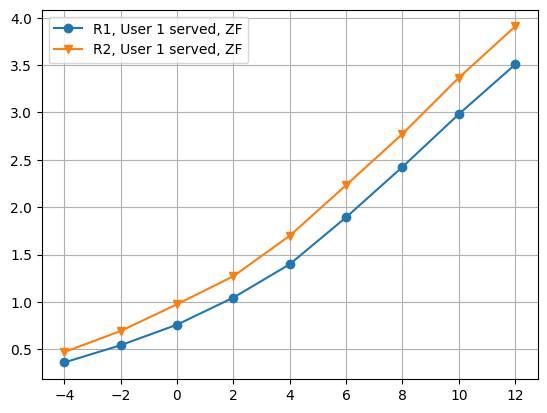

In [29]:
# Case 1 : theta optimised for User 1  : 
#iter_max = 6
rate1_iter_AO1zf = np.zeros((P_range,ite))
rate2_iter_AO1zf = np.zeros((P_range,ite))
for p in range(P_range):
  for j in range(ite):
    v = np.exp(1j*phase2_AO1[p,j,:])
    Theta = np.diag(v)
    Ch_eq[p,j,:,:] = Hr[p,j,:,:] @ Theta @ G[p,j,:,:] + Hd[p,j,:,:]
    for i in range(K):
      #for iter in range(iter_max):
       
        Ch_eq1 = Ch_eq[p,j,0,:]
        Ch_eq2 = Ch_eq[p,j,1,:]

        # Optimising the W
        
        W = np.linalg.pinv(Ch_eq[p,j,:,:])

        #importing codes from waterfilling:
        #wk = np.linalg.norm(W, axis = 0)

       # wk = np.sort(wk)
        #print('wk=',(wk))

        # Extracting W2 from W
        W2 = W[:,1]/np.linalg.norm(W[:,1])*np.sqrt(P_mW[p]/K)
        W1 = W[:,0]/np.linalg.norm(W[:,0])*np.sqrt(P_mW[p]/K)

        # SINR and Rate after update

        rate1_iter_AO1zf[p,j]=(np.log2( 1 + ((np.linalg.norm(Ch_eq1 @ W1)) **2)/ (noise + (np.linalg.norm(Ch_eq1 @ W2))**2)))
        rate2_iter_AO1zf[p,j]=(np.log2( 1 + ((np.linalg.norm(Ch_eq2 @ W2)) **2)/ (noise + (np.linalg.norm(Ch_eq2 @ W1))**2)))

rate1_stage3_AO1 = np.mean(rate1_iter_AO1zf,axis=1)
rate2_stage3_AO1 = np.mean(rate2_iter_AO1zf,axis=1)
print('Avg. rate for User 1 AO1 @ stage 3:\n R1 = ',rate1_stage3_AO1)
print('Avg. rate for User 2 AO1 @ stage 3:\n R2 = ',rate2_stage3_AO1)
plt.plot(power_dBm, rate1_stage3_AO1, marker='o', label= 'R1, User 1 served, ZF')
plt.plot(power_dBm, rate2_stage3_AO1, marker= 'v', label= 'R2, User 1 served, ZF')
plt.grid()
plt.legend()
plt.show()


In [30]:
# Case 2 : Phase optimised for User 2 :
#iter_max=6
#phase2_AO2 = phase2_AO2/np.linalg.norm(phase2_AO2)
rate1_iter_AO2zf = np.zeros((P_range,ite))
rate2_iter_AO2zf = np.zeros((P_range,ite))

for p in range(P_range):
  for j in range(ite):
    v = np.exp(1j*phase2_AO2[p,j,:])
    Theta = np.diag(v)
    Ch_eq[p,j,:,:] = Hr[p,j,:,:] @ Theta @ G[p,j,:,:] + Hd[p,j,:,:]
    for i in range(K):
      for iter in range(iter_max):

        Ch_eq1 = Ch_eq[p,j,0,:]
        Ch_eq2 = Ch_eq[p,j,1,:]

        #Optimising the W
        W = np.linalg.pinv(Ch_eq[p,j,:,:])
        #print('zeroforcing check:\n', Ch_eq @ W)
        # Extracting W2 from W
        W2 = W[:,1]/np.linalg.norm(W[:,1])*np.sqrt(P_mW[p]/K)
        W1 = W[:,0]/np.linalg.norm(W[:,0])*np.sqrt(P_mW[p]/K)
        #print('W2=', W2)

        # SINR and Rate after update
        rate2_iter_AO2zf[p,j]=(np.log2( 1 + ((np.linalg.norm(Ch_eq2 @ W2)) **2)/(noise + (np.linalg.norm(Ch_eq2 @ W1))**2)))
        rate1_iter_AO2zf[p,j]=(np.log2( 1 + ((np.linalg.norm(Ch_eq1 @ W1))**2)/ (noise + (np.linalg.norm(Ch_eq1 @ W2))**2)))

rate1_stage3_AO2 = np.mean(rate1_iter_AO2zf,axis=1)
rate2_stage3_AO2 = np.mean(rate2_iter_AO2zf,axis=1)
print('rate for User 1 AO2 stage 3:\n R1 = ',rate1_stage3_AO2)
print('rate for User 2 AO2 stage 3:\n R2 = ',rate2_stage3_AO2)


rate for User 1 AO2 stage 3:
 R1 =  [0.26961551 0.40955754 0.58670032 0.81072242 1.13301968 1.55626146
 2.07242481 2.59536244 3.10589099]
rate for User 2 AO2 stage 3:
 R2 =  [1.06679403 1.40458384 1.85667557 2.34815687 2.86503772 3.506303
 4.15668634 4.77941048 5.35167428]


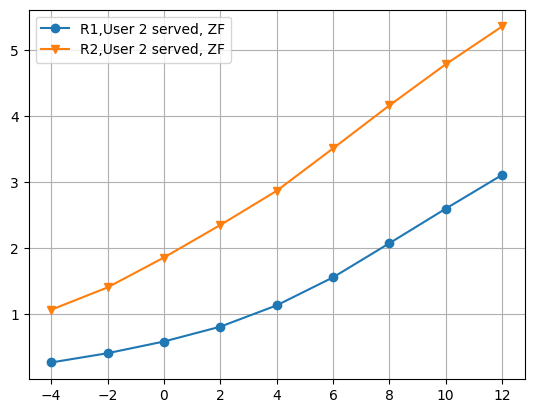

In [31]:
plt.plot(power_dBm, rate1_stage3_AO2, marker='o', label= 'R1,User 2 served, ZF')
plt.plot(power_dBm, rate2_stage3_AO2, marker= 'v', label= 'R2,User 2 served, ZF')
plt.legend()
plt.grid()
plt.show()

In [32]:
# Case 3 : Random Phase + ZF Beam-Forming :
rate1_iter_NI = np.zeros((P_range,ite))
rate2_iter_NI = np.zeros((P_range,ite))
#iter_max = 6
phase_rnd = np.random.rand((N))*2*np.pi

for p in range(P_range):
  for j in range(ite):
    for i in range(K):
      #for iter in range(iter_max):
        v = np.exp(1j* phase_rnd)
        Theta = np.diag(v)

        Ch_eq[p,j,:,:] = Hr[p,j,:,:] @ Theta @ G[p,j,:,:] + Hd[p,j,:,:]
        Ch_eq1 = Ch_eq[p,j,0,:]
        Ch_eq2 = Ch_eq[p,j,1,:]


        # Optimising the W
        W = np.linalg.pinv(Ch_eq[p,j,:,:])
        #print('zeroforcing check:\n', Ch_eq @ W)
        # Extracting W2 from W
        W2 = W[:,1]/np.linalg.norm(W[:,1])*np.sqrt(P_mW[p]/K)
        W1 = W[:,0]/np.linalg.norm(W[:,0])*np.sqrt(P_mW[p]/K)

        # Rate after update
        rate1_iter_NI[p,j] = (np.log2( 1 + ((np.linalg.norm(Ch_eq1 @ W1))**2)/ (noise + (np.linalg.norm(Ch_eq1 @ W2))**2)))
        rate2_iter_NI[p,j] = (np.log2( 1 + ((np.linalg.norm(Ch_eq2 @ W2)) **2)/(noise + (np.linalg.norm(Ch_eq2 @ W1))**2)))

rate1_stage3_Rnd = np.mean(rate1_iter_NI,axis=1)
rate2_stage3_Rnd = np.mean(rate2_iter_NI,axis=1)

print('rate for User 1 @ stage 3:\n R1 = ',rate1_stage3_Rnd)
print('rate for User 2 @ stage 3:\n R2 = ',rate2_stage3_Rnd)

SR_U1 = rate1_stage3_AO1 + rate2_stage3_AO1
SR_U2 = rate1_stage3_AO2 + rate2_stage3_AO2
SR_NI = rate1_stage3_Rnd + rate2_stage3_Rnd
print('Sum Rate case 1:',rate1_stage3_AO1 + rate2_stage3_AO1)
print('Sum Rate case 2:',rate1_stage3_AO2 + rate2_stage3_AO2)
print('Sum Rate case 3:',rate1_stage3_Rnd + rate2_stage3_Rnd)



rate for User 1 @ stage 3:
 R1 =  [0.24626828 0.37193333 0.5453725  0.77906496 1.09422924 1.47139902
 1.97677436 2.51968482 3.03889328]
rate for User 2 @ stage 3:
 R2 =  [0.23628931 0.35671873 0.54022911 0.78312323 1.09933259 1.45057036
 1.8600072  2.47133325 2.9663692 ]
Sum Rate case 1: [0.83260105 1.23740337 1.73586625 2.31775182 3.09705181 4.12625728
 5.19869092 6.34872742 7.41379848]
Sum Rate case 2: [1.33640954 1.81414137 2.44337589 3.1588793  3.9980574  5.06256446
 6.22911114 7.37477292 8.45756527]
Sum Rate case 3: [0.48255759 0.72865206 1.08560161 1.56218819 2.19356183 2.92196937
 3.83678156 4.99101807 6.00526247]


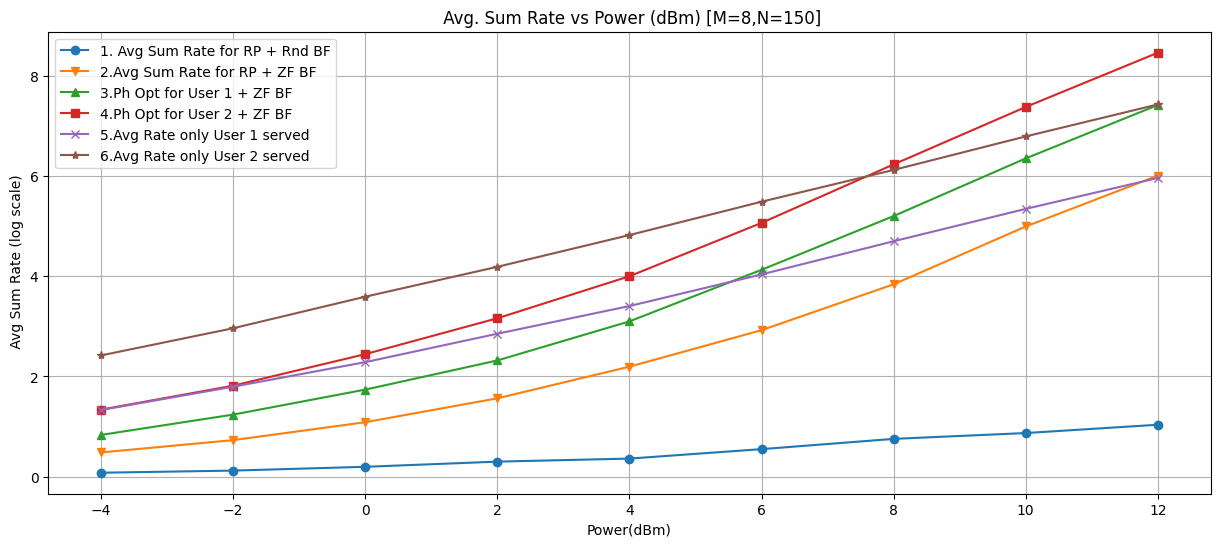

In [33]:
plt.figure(figsize=(15,6))
# 1. Avg Sum Rate for RP + Rnd BF
plt.plot(power_dBm,avg_sum_rate1, marker='o', label='1. Avg Sum Rate for RP + Rnd BF')

# 2. Avg Sum Rate for RP + ZF BF
plt.plot(power_dBm,SR_NI, marker='v',label='2.Avg Sum Rate for RP + ZF BF')

# 3. Avg Sum Rate for Ph Opt for User 1 + ZF BF
plt.plot(power_dBm, SR_U1, marker='^', label='3.Ph Opt for User 1 + ZF BF')

# 4. Avg Sum Rate for Ph Opt for User 2 + ZF BF
plt.plot(power_dBm, SR_U2, marker='s', label='4.Ph Opt for User 2 + ZF BF')

# 5. Avg  Rate Only User 1 is served
plt.plot(power_dBm, rate1_stage2_NI, marker='x', label='5.Avg Rate only User 1 served')

# 6. Avg Rate Only User 2 is served
plt.plot(power_dBm, rate2_stage2_NI, marker='*', label='6.Avg Rate only User 2 served')

plt.title(' Avg. Sum Rate vs Power (dBm) [M=8,N=150]')

plt.xlabel('Power(dBm)')
plt.ylabel(' Avg Sum Rate (log scale)')
plt.grid(True)
plt.legend()
plt.show()
 